In [55]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('/Users/cuizhengyi/Desktop/summerproject/code/genstyle.mplstyle')

pi = np.pi
h = 6.62607015e-34 # Planck's constant
hbar = h / (2*pi)
e = 1.602176634e-19  # Electron charge

RQ = h/(4*e**2)  # Resistance quantum
G0 = 2*e**2/h # Conductance quantum
Phi0 = h/(2*e) # Flux quantum
phi0 = hbar/(2*e) # Reduced flux quantumphase = np.linspace(0,2,21)*np.pi

wcav = wcav = 1.2/hbar # in units of delta (wcav == omega_r, original resonator frequency)
# scgap = 60e9 * 2 * pi *hbar
#wcav = 0.044*0.2e-3*e/h

phase = np.linspace(0,2,501)*pi

def tau(channel):
    t=1-channel**2
    return t

def inv_LJ(phase,tau): #single channel inverse indutctance. From Kos 2013 eq. 16.
    return (1/4 * tau*(np.cos(phase) + tau*np.sin(phase/2)**4)/(1 - tau * np.sin(phase/2)**2)**(3/2))
def dw_curv(phase,tau): #Curvature type (adiabatic) freq shift contribution. units ang. freq. From Park 2020 main text.
    return inv_LJ(phase,tau)/hbar

def E_A(phase, tau): #ABS energy. units energy
    return  np.sqrt(1 - tau * np.sin(phase/2)**2)

def w_A(phase, tau): #ABS transition frequency. units ang. freq
    return 2 * E_A(phase,tau)/hbar

def g(phase,tau): #ABS-resonator coupling strength. units ang. freq
    return ( 1/hbar) *(np.sqrt(1-tau)/2) * (1/E_A(phase,tau) - E_A(phase,tau))

def dw_JC(phase,tau): #Jaynes-Cummings type (dispersive) frequency shift contribution. units ang. freq. From Park 2020 eq. 7.
    Delta_w = w_A(phase,tau) - wcav #ABS-res freq detuning
    Sigma_w = w_A(phase,tau) + wcav #ABS-res freq sum
    return  g(phase,tau)**2 * ( - 1/Delta_w - 1/Sigma_w)
def dw_tot(phase,tau): #total ang. frequency shift. From Park 2020 eq. 6
    Delta_w = w_A(phase,tau) - wcav #ABS-res freq detuning
    Sigma_w = w_A(phase,tau) + wcav #ABS-res freq sum
    return dw_curv(phase,tau) + g(phase,tau)**2 * (2/w_A(phase, tau) - 1/Delta_w - 1/Sigma_w)

(-1.2, 1.2)

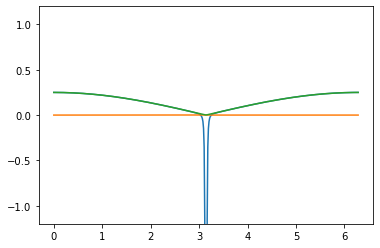

In [60]:
plt.plot(phase, hbar*dw_curv(phase, 0.99999))
plt.plot(phase, hbar*dw_JC(phase, 0.99999))
plt.plot(phase, hbar*dw_tot(phase, 0.99999))
plt.ylim(-1.2, 1.2)

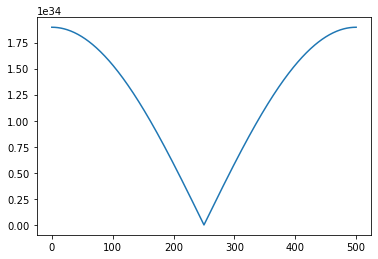

In [39]:
plt.plot(w_A(phase, 1))